In [50]:
import requests as r

In [51]:
url = 'https://api.covid19api.com/dayone/country/brazil'
resp = r.get(url)

In [52]:
raw_data = resp.json()

In [53]:
raw_data[0]

{'ID': '5b679794-2952-4c4c-a873-af6ff457b0fd',
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Confirmed': 1,
 'Deaths': 0,
 'Recovered': 0,
 'Active': 1,
 'Date': '2020-02-26T00:00:00Z'}

In [54]:
final_data = []
for obs in raw_data:
    final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'], obs['Date']])

In [55]:
final_data.insert(0,['confirmados', 'obitos', 'recuperados', 'ativos', 'data'])
final_data

[['confirmados', 'obitos', 'recuperados', 'ativos', 'data'],
 [1, 0, 0, 1, '2020-02-26T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-27T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-28T00:00:00Z'],
 [2, 0, 0, 2, '2020-02-29T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-01T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-02T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-03T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-04T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-05T00:00:00Z'],
 [13, 0, 0, 13, '2020-03-06T00:00:00Z'],
 [13, 0, 0, 13, '2020-03-07T00:00:00Z'],
 [20, 0, 0, 20, '2020-03-08T00:00:00Z'],
 [25, 0, 0, 25, '2020-03-09T00:00:00Z'],
 [31, 0, 0, 31, '2020-03-10T00:00:00Z'],
 [38, 0, 0, 38, '2020-03-11T00:00:00Z'],
 [52, 0, 0, 52, '2020-03-12T00:00:00Z'],
 [151, 0, 0, 151, '2020-03-13T00:00:00Z'],
 [151, 0, 0, 151, '2020-03-14T00:00:00Z'],
 [162, 0, 0, 162, '2020-03-15T00:00:00Z'],
 [200, 0, 1, 199, '2020-03-16T00:00:00Z'],
 [321, 1, 2, 318, '2020-03-17T00:00:00Z'],
 [372, 3, 2, 367, '2020-03-18T00:00:00Z'],
 [621, 6, 2, 613, '2020-03-19T00:00:00Z'],


In [56]:
CONFIRMADOS = 0
OBITOS = 1
RECUPERADOS = 2 
ATIVOS = 3
DATA = 4

In [57]:
for i in range(1, len(final_data)):
    final_data[i][DATA] = final_data[i][DATA][:10]
    

In [58]:
final_data

[['confirmados', 'obitos', 'recuperados', 'ativos', 'data'],
 [1, 0, 0, 1, '2020-02-26'],
 [1, 0, 0, 1, '2020-02-27'],
 [1, 0, 0, 1, '2020-02-28'],
 [2, 0, 0, 2, '2020-02-29'],
 [2, 0, 0, 2, '2020-03-01'],
 [2, 0, 0, 2, '2020-03-02'],
 [2, 0, 0, 2, '2020-03-03'],
 [4, 0, 0, 4, '2020-03-04'],
 [4, 0, 0, 4, '2020-03-05'],
 [13, 0, 0, 13, '2020-03-06'],
 [13, 0, 0, 13, '2020-03-07'],
 [20, 0, 0, 20, '2020-03-08'],
 [25, 0, 0, 25, '2020-03-09'],
 [31, 0, 0, 31, '2020-03-10'],
 [38, 0, 0, 38, '2020-03-11'],
 [52, 0, 0, 52, '2020-03-12'],
 [151, 0, 0, 151, '2020-03-13'],
 [151, 0, 0, 151, '2020-03-14'],
 [162, 0, 0, 162, '2020-03-15'],
 [200, 0, 1, 199, '2020-03-16'],
 [321, 1, 2, 318, '2020-03-17'],
 [372, 3, 2, 367, '2020-03-18'],
 [621, 6, 2, 613, '2020-03-19'],
 [793, 11, 2, 780, '2020-03-20'],
 [1021, 15, 2, 1004, '2020-03-21'],
 [1546, 25, 2, 1519, '2020-03-22'],
 [1924, 34, 2, 1888, '2020-03-23'],
 [2247, 46, 2, 2199, '2020-03-24'],
 [2554, 59, 2, 2493, '2020-03-25'],
 [2985, 77, 6, 2

In [59]:
import datetime as dt

In [60]:
print(dt.time(12,6,21,7))
print('-------')
print(dt.date(2020,4,25))
print('-------')
print(dt.datetime(2020,4,25,12,6,21,7))

12:06:21.000007
-------
2020-04-25
-------
2020-04-25 12:06:21.000007


In [61]:
natal = dt.date(2020,12,25)
reveillon = dt.date(2021,1,1)
print(reveillon-natal)
print((reveillon-natal).days)
print((reveillon-natal).seconds)
print((reveillon-natal).microseconds)

7 days, 0:00:00
7
0
0


In [62]:
import csv
import datetime as dt

In [63]:
with open('brasil-covid.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(final_data)

In [64]:
for i in range(1, len(final_data)):
    final_data[i][DATA]= dt.datetime.strptime(final_data[i][DATA], '%Y-%m-%d')

In [65]:
final_data

[['confirmados', 'obitos', 'recuperados', 'ativos', 'data'],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 26, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 27, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 28, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 2, 29, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 1, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 2, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 3, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 4, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 5, 0, 0)],
 [13, 0, 0, 13, datetime.datetime(2020, 3, 6, 0, 0)],
 [13, 0, 0, 13, datetime.datetime(2020, 3, 7, 0, 0)],
 [20, 0, 0, 20, datetime.datetime(2020, 3, 8, 0, 0)],
 [25, 0, 0, 25, datetime.datetime(2020, 3, 9, 0, 0)],
 [31, 0, 0, 31, datetime.datetime(2020, 3, 10, 0, 0)],
 [38, 0, 0, 38, datetime.datetime(2020, 3, 11, 0, 0)],
 [52, 0, 0, 52, datetime.datetime(2020, 3, 12, 0, 0)],
 [151, 0, 0, 151, datetime.datetime(2020, 3, 13, 0, 0)],
 [151, 0, 0, 151, datetime.da

In [82]:
def get_datasets(y, labels):
    if type(y[0]) == list:
        datasets= []
        for i in range(len(y)):
            datasets.append({
                'label': labels[i],
                'data': y[i]
            })
        return datasets
    else:
        return[
            {
            'label': labels[0],
            'data': y
            }
        ]
        

In [83]:
def set_title(title=''):
    if title != '':
        display= 'true'
    else:
        display='false'
    return{
        'title':title,
        'display':display
    }

In [90]:
def create_chart(x,y,labels,kind='bar',title=''):
    datasets= get_datasets(y,labels)
    options = set_title(title)
    
    chart = {
        'type': kind,
        'data': {
            'labels':x,
            'datasets':datasets
        },
        'options': options
    }
    return chart

In [91]:
def get_api_chart(chart):
    url_base= 'https://quickchart.io/chart/create'
    resp= r.get(f'{url_base}?c={str(chart)}')
    return resp.content

In [92]:
def save_image(path, content):
    with open(path, 'wb') as image:
        image.write(content)

In [93]:
from PIL import Image
from IPython.display import display

In [94]:
def display_image(path):
    img_pil = Image.open(path)
    display(img_pil)

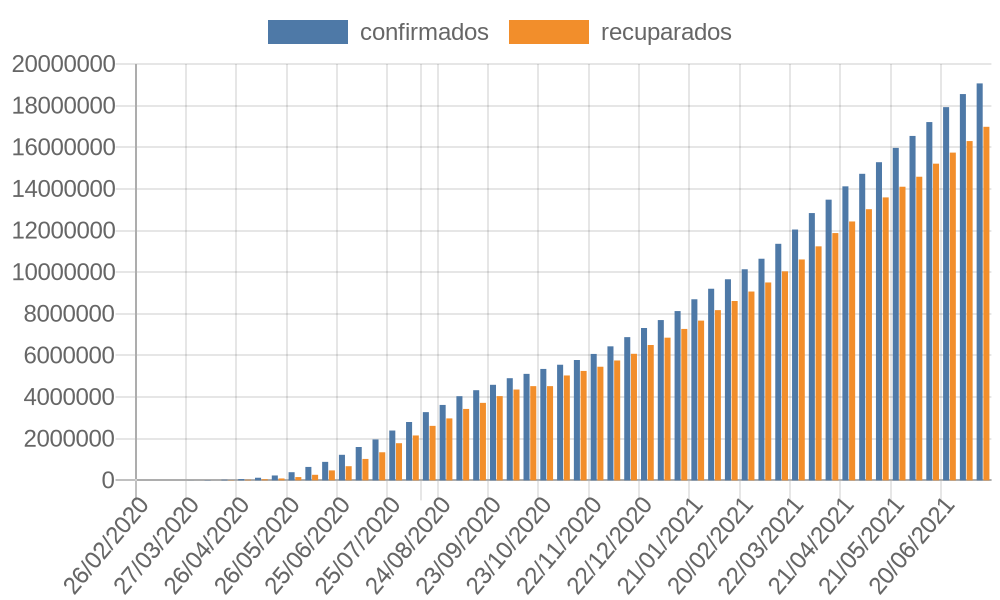

In [95]:
y_data_1=[]
for obs in final_data[1::10]:
    y_data_1.append(obs[CONFIRMADOS])

y_data_2=[]
for obs in final_data[1::10]:
    y_data_2.append(obs[RECUPERADOS])

labels = ['confirmados', 'recuparados']

x=[]
for obs in final_data[1::10]:
    x.append(obs[DATA].strftime('%d/%m/%Y'))

chart= create_chart(x,[y_data_1, y_data_2], labels, title= 'gráfico confirmados vs recuperados')
chart_content = get_api_chart(chart)
save_image('meu-primeiro-grafico.png',chart_content)
display_image('meu-primeiro-grafico.png')




In [97]:
from urllib.parse import quote
    

In [98]:
def get_api_qrcode(link):
    text = quote(link) #parse do link para url
    url_base = 'https://quickchart.io/qr'
    resp = r.get(f'{url_base}?text={text}')
    return resp.content

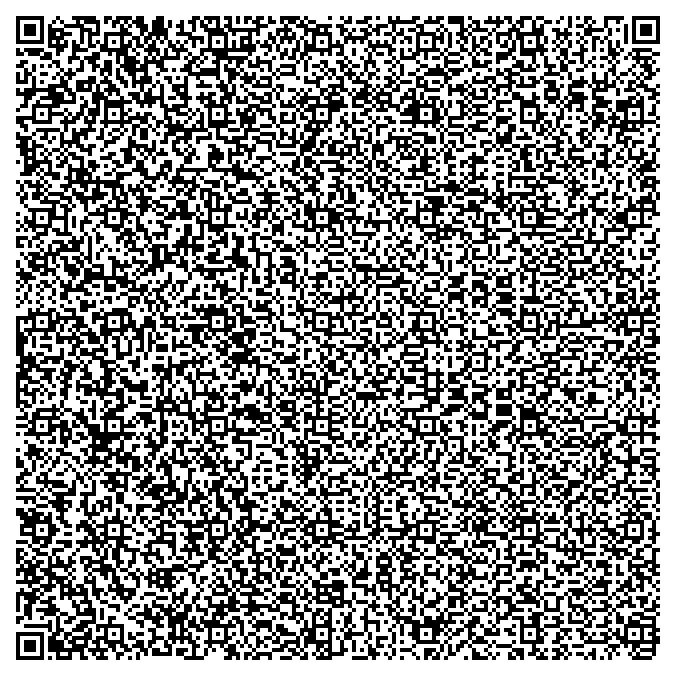

In [100]:
url_base= 'https://quickchart.io/chart/create'
link = f'{url_base}?c={str(chart)}'
save_image('qr-code.png', get_api_qrcode(link))
display_image('qr-code.png')